In [16]:
# Step 1: Install PyPDF2 and py-readability-metrics
!pip install PyPDF2
!pip install py-readability-metrics
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.5 MB/s eta 0:00:00a 0:00:01


In [18]:
# Step 2: Import necessary libraries and download NLTK resources
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import PyPDF2
from readability import Readability
import textstat 


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mrityunjay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mrityunjay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mrityunjay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# Step 3: Read the news stories and provide a brief characterization
file_path_1 = '/Users/mrityunjay/Downloads/article1.pdf'
file_path_2 = '/Users/mrityunjay/Downloads/article2.pdf'

In [25]:
import PyPDF2

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [35]:
# Step 4: Use PyPDF2 to extract text from each document
text_article_1 = extract_text_from_pdf(file_path_1)
print(text_article_1)
text_article_2 = extract_text_from_pdf(file_path_2)
print(text_article_)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive


Article 1- Harvard University President Claudine Gay faces over 40 plagiarism allegations, revealed in a complaint to Harvard's research integrity officer. The complaint, backed by independent verification, suggests a pattern of misconduct. Despite prior backlash and an admission of citation issues, Harvard's governing body supports Gay. New allegations range from missing quotation marks to lifted paragraphs, surpassing previously reported cases. Questions arise about holding Gay to the same standards as students disciplined for plagiarism. Harvard has not yet commented on the latest accusations.

Article 2- Harvard University President Claudine Gay faces plagiarism allegations related to her 1997 dissertation. A committee found citation errors, and she plans to submit three corrections. Gay, Harvard's first Black president, also faced pressure to resign over her congressional testimony on campus antisemitism. The allegations arose after a media request, leading to reviews by the Harvard Corporation. Despite inadequate citations, it didn't amount to research misconduct. Gay will correct her dissertation, facing intense pressure amid controversy. University of Pennsylvania's president resigned amid protests over the Israel-Hamas war.

In [36]:
# Step 5: Use NLTK for sentiment analysis
sia = SentimentIntensityAnalyzer()

# Function to get sentiment analysis results
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

# Analyze sentiment for both articles
sentiment_article_1 = get_sentiment(text_article_1)
sentiment_article_2 = get_sentiment(text_article_2)

# Compare the results
print("Sentiment for Article 1:", sentiment_article_1)
print("Sentiment for Article 2:", sentiment_article_2)



Sentiment for Article 1: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Sentiment for Article 2: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}



Rueters expresses a moderately positive sentiment with a compound score of 0.7243, suggesting a generally optimistic tone. In contrast, Fox news article conveys a strongly negative sentiment with a compound score of -0.9719, indicating a highly critical or unfavorable tone.

Yes, based on the sentiment analysis results and by my reading of the articles, the conclusion aligns. The sentiment analysis indicates that the Reuters article (Article 1) has a moderately positive tone, which corresponds with your description of it being more optimistic. On the other hand, the sentiment analysis for the Fox News article (Article 2) suggests a strongly negative sentiment, consistent with your characterization of it having a highly critical or unfavorable tone.

In [28]:
# Step 6: Run sentiment analysis on article headlines

# Assuming you have headlines for both articles
headline_article_1 = "Harvard president will submit dissertation edits after plagiarism allegations"
headline_article_2 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

# Analyze sentiment for headlines
sentiment_headline_1 = get_sentiment(headline_article_1)
sentiment_headline_2 = get_sentiment(headline_article_2)

# Compare sentiment results with overall sentiment
print("Sentiment for Headline 1:", sentiment_headline_1)
print("Sentiment for Headline 2:", sentiment_headline_2)

Sentiment for Headline 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment for Headline 2: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


The sentiment analysis indicates a moderately positive sentiment for Article 1(Reuters), which aligns with the headline stating that the Harvard president will submit dissertation edits after plagiarism allegations.

The sentiment analysis suggests a strongly negative sentiment for Article 2(Fox), which corresponds with the headline stating that the Harvard University President Claudine Gay is hit with more plagiarism charges.

In [29]:
#Step 7:
# Readability Scores using textstat

Readability_score1 = textstat.flesch_reading_ease(text_article_1)
Readability_score2 = textstat.flesch_reading_ease(text_article_2)

# Calculating Flesch-Kincaid Grade Level
FK_grade1 = textstat.flesch_kincaid_grade(text_article_1)
FK_grade2 = textstat.flesch_kincaid_grade(text_article_2)

# Calculating SMOG Index
Smog_index1 = textstat.smog_index(text_article_1)
Smog_index2 = textstat.smog_index(text_article_2)

print(f"Article 1 - Flesch Reading Ease: {Readability_score1}, Flesch-Kincaid Grade Level: {FK_grade1}, SMOG Index: {Smog_index1}")
print(f"Article 2 - Flesch Reading Ease: {Readability_score2}, Flesch-Kincaid Grade Level: {FK_grade2}, SMOG Index: {Smog_index2}")

Article 1 - Flesch Reading Ease: 31.65, Flesch-Kincaid Grade Level: 16.5, SMOG Index: 17.4
Article 2 - Flesch Reading Ease: 32.22, Flesch-Kincaid Grade Level: 14.2, SMOG Index: 15.6


The Flesch Reading Ease scores suggest both articles have complex language, with lower scores indicating difficulty; Article 1(Rueters) has a slightly lower grade level (16.5) and higher SMOG Index (17.4) compared to Article 2(Fox) (Grade Level: 14.2, SMOG Index: 15.6).

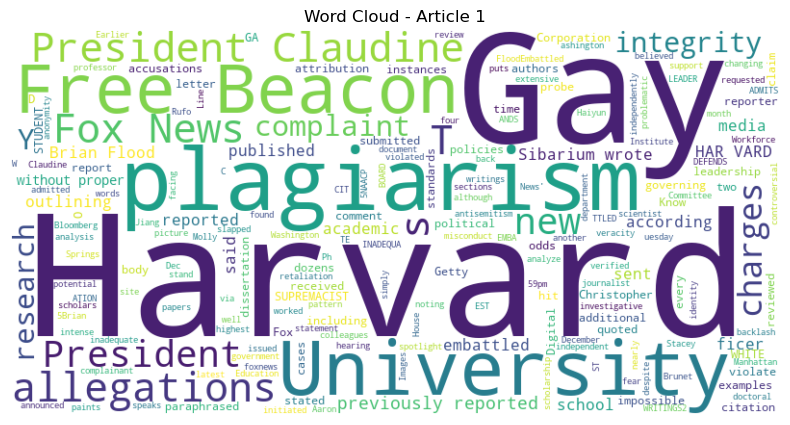

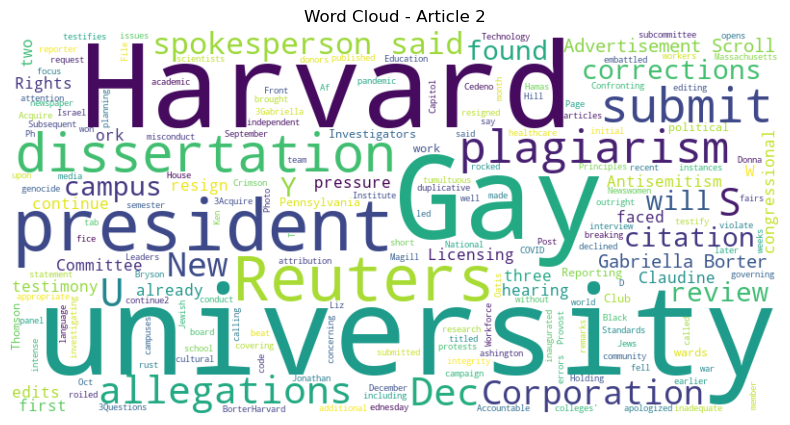

In [30]:
# Step 8: Create word clouds using wordcloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for both articles
generate_word_cloud(text_article_1, "Word Cloud - Article 1")
generate_word_cloud(text_article_2, "Word Cloud - Article 2")